# An Empirical Comparison of Supervised and Self-Supervised Learning

In [1]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

In [2]:
%load_ext autoreload
%autoreload 2

## Baseline: convolutional neural network

In [3]:
conv_args = TrainArgs(batchsize = 10)

In [4]:
ConvNet, conv_losses = train_ConvNet(conv_args)

100%|██████████| 170498071/170498071 [00:17<00:00, 9799859.96it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 0, i:   999] avg mini-batch loss: 2.300
[epoch: 0, i:  1499] avg mini-batch loss: 2.296
[epoch: 0, i:  1999] avg mini-batch loss: 2.290
[epoch: 0, i:  2499] avg mini-batch loss: 2.265
[epoch: 0, i:  2999] avg mini-batch loss: 2.209
[epoch: 0, i:  3499] avg mini-batch loss: 2.176
[epoch: 0, i:  3999] avg mini-batch loss: 2.172
[epoch: 0, i:  4499] avg mini-batch loss: 2.134
[epoch: 0, i:  4999] avg mini-batch loss: 2.108
[epoch: 1, i:   499] avg mini-batch loss: 2.095
[epoch: 1, i:   999] avg mini-batch loss: 2.092
[epoch: 1, i:  1499] avg mini-batch loss: 2.054
[epoch: 1, i:  1999] avg mini-batch loss: 2.019
[epoch: 1, i:  2499] avg mini-batch loss: 2.013
[epoch: 1, i:  2999] avg mini-batch loss: 1.937
[epoch: 1, i:  3499] avg mini-batch loss: 1.922
[epoch: 1, i:  3999] avg mini-batch loss: 1.930
[epoch: 1, i:  4499] avg mini-batch loss: 1.896
[epoch: 1, i:  4999] 

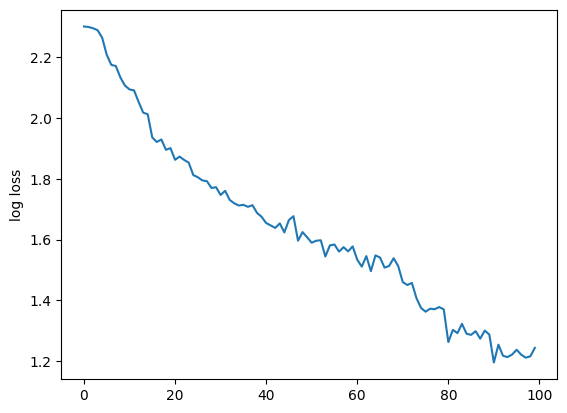

In [5]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [6]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Baseline accuracy of the convolutional model is 52.65 %


## Momentum Contrast

### Pre-Training the Encoder

In [7]:
encoder_args = TrainArgs(epochs = 50)

In [8]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.033920
Train Epoch: 2 	Loss: 0.012416
Train Epoch: 3 	Loss: 0.006768
Train Epoch: 4 	Loss: 0.004789
Train Epoch: 5 	Loss: 0.003909
Train Epoch: 6 	Loss: 0.003405
Train Epoch: 7 	Loss: 0.003099
Train Epoch: 8 	Loss: 0.002846
Train Epoch: 9 	Loss: 0.002663
Train Epoch: 10 	Loss: 0.002548
Train Epoch: 11 	Loss: 0.002420
Train Epoch: 12 	Loss: 0.002314
Train Epoch: 13 	Loss: 0.002183
Train Epoch: 14 	Loss: 0.002096
Train Epoch: 15 	Loss: 0.002025
Train Epoch: 16 	Loss: 0.001972
Train Epoch: 17 	Loss: 0.001843
Train Epoch: 18 	Loss: 0.001814
Train Epoch: 19 	Loss: 0.001778
Train Epoch: 20 	Loss: 0.001711
Train Epoch: 21 	Loss: 0.001652
Train Epoch: 22 	Loss: 0.001619
Train Epoch: 23 	Loss: 0.001547
Train Epoch: 24 	Loss: 0.001524
Train Epoch: 25 	Loss: 0.001505
Train Epoch: 26 	Loss: 0.001464
Train Epoch: 27 	Loss: 0.001428
Train Epoch: 28 	Loss: 0.001402
Train Epoch: 29 	Loss: 0.001371
Train

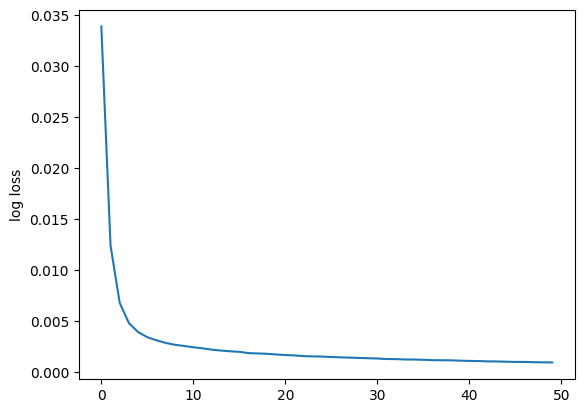

In [9]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [10]:
data, targets = encode_data()

Files already downloaded and verified


100%|██████████| 10000/10000 [01:24<00:00, 118.84it/s]


In [11]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified


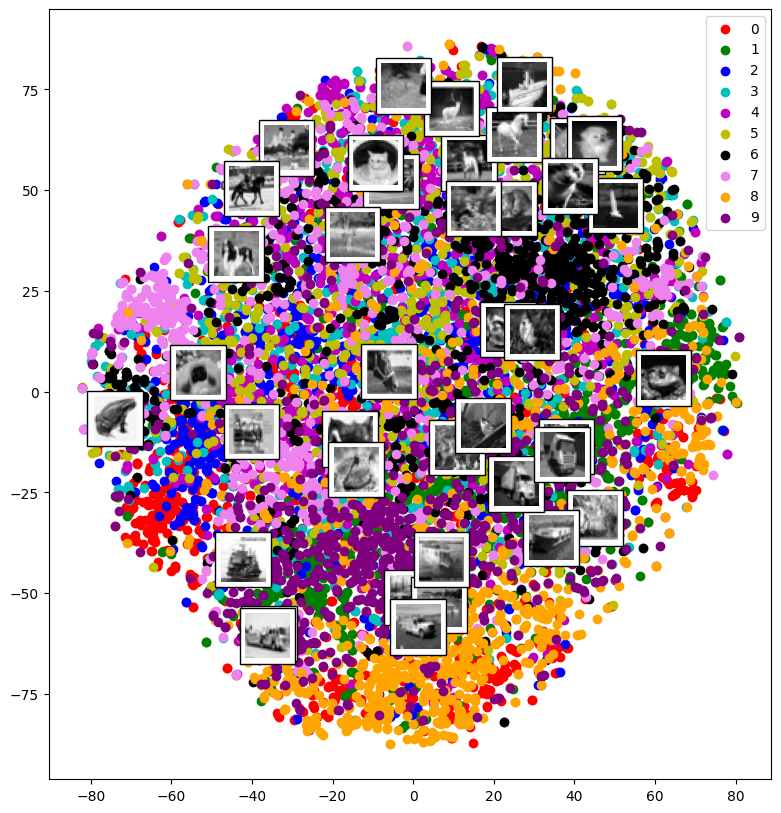

In [12]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [13]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified


100%|██████████| 50000/50000 [07:02<00:00, 118.34it/s]


Files already downloaded and verified


100%|██████████| 10000/10000 [01:23<00:00, 120.30it/s]


In [14]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [15]:
svm.score(X_test, y_test)

0.6576

### Multiple Runs

In [16]:
# subsample so things run faster
X_train, y_train = encode_data(train=True, subsample = True)
X_test, y_test = encode_data(train=False, subsample = True)

Files already downloaded and verified


100%|██████████| 5000/5000 [00:41<00:00, 120.73it/s]


Files already downloaded and verified


100%|██████████| 1000/1000 [00:08<00:00, 118.54it/s]


In [17]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [18]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=True)
    conv_errors.append(test_conv(ConvNet, subsample=True)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 1, i:   499] avg mini-batch loss: 2.294
[epoch: 2, i:   499] avg mini-batch loss: 2.250
[epoch: 3, i:   499] avg mini-batch loss: 2.155
[epoch: 4, i:   499] avg mini-batch loss: 2.077
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.303
[epoch: 1, i:   499] avg mini-batch loss: 2.302
[epoch: 2, i:   499] avg mini-batch loss: 2.301
[epoch: 3, i:   499] avg mini-batch loss: 2.299
[epoch: 4, i:   499] avg mini-batch loss: 2.297
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.303
[epoch: 1, i:   499] avg mini-batch loss: 2.301
[epoch: 2, i:   499] avg mini-batch loss: 2.298
[epoch: 3, i:   499] avg mini-batch loss: 2.293
[epoch: 4, i:   499] avg mini-batch loss: 2.278
Files already downloaded and verified


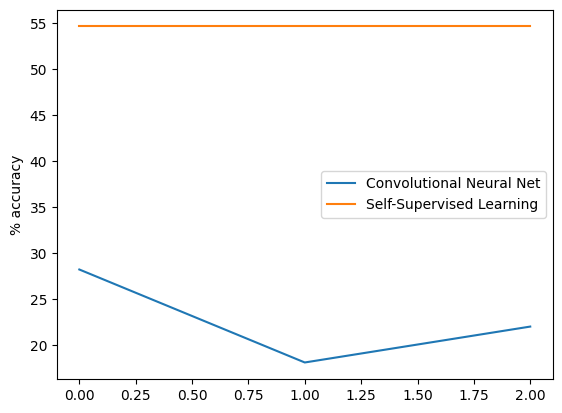

In [19]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [20]:
conv_errors

[28.199999999999996, 18.099999999999998, 22.0]

In [21]:
svm_errors

[0.546, 0.546, 0.546]

In [22]:
conv_errors

[28.199999999999996, 18.099999999999998, 22.0]